<h1>Assignment 4</h1>

<h2>Problem Statement</h2>

You own the mall and want to understand the customers who can quickly
converge [Target Customers] so that the insight can be given to the
marketing team and plan the strategy accordingly.


<h3><i>Importing modules</i></h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3><i>Load the dataset</i></h3>

In [2]:
df=pd.read_csv(r'E:\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_Income','Spending Score (1-100)': 'Spending_Score'})
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [8]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<h3><i>Perform Visualisation</i></h3>

<h4><i>Univariate Analysis</i></h4>

<AxesSubplot:xlabel='Spending_Score', ylabel='Count'>

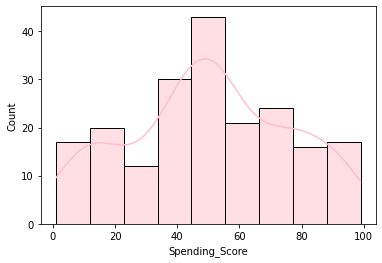

In [9]:
sns.histplot(df.Spending_Score,kde=True,color='pink')

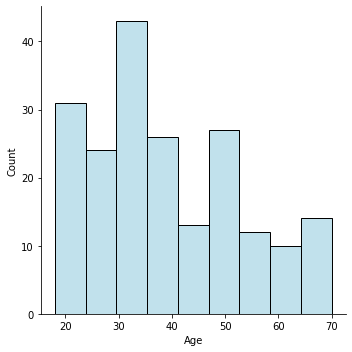

In [10]:
sns.displot(df.Age,color='lightblue')

([<matplotlib.patches.Wedge at 0x21d1d210940>,
 [Text(-0.20611945413751356, 1.080515974257694, ''),
  Text(0.24359571852615253, -1.2769734241227293, '')],
 [Text(-0.11242879316591647, 0.5893723495951058, '156.0%'),
  Text(0.14990505755455538, -0.7858297994601411, '144.0%')])

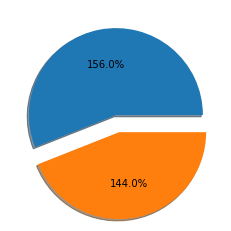

In [11]:
plt.pie(df.Gender.value_counts(),[0,0.2],shadow='True',autopct="1%.1f%%")

<h4><i>Bivariate Analysis</i></h4>

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

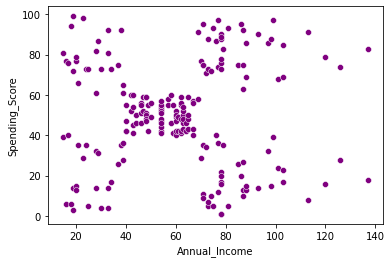

In [12]:
sns.scatterplot(x=df.Annual_Income,y=df.Spending_Score,color='purple')

Text(0.5, 1.0, 'LinePlot')

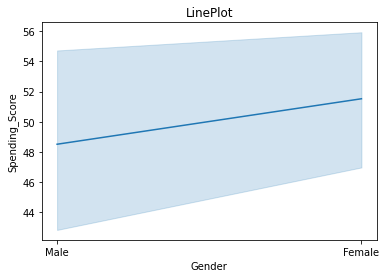

In [13]:
sns.lineplot(x=df.Gender,y=df.Spending_Score)
plt.xlabel('Gender')
plt.ylabel('Spending_Score')
plt.title('LinePlot')

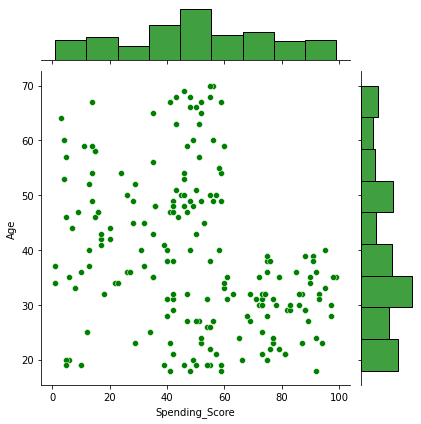

In [14]:
sns.jointplot(x=df.Spending_Score,y=df.Age,color='green')

<h4><i>Multivariate analysis</i></h4>

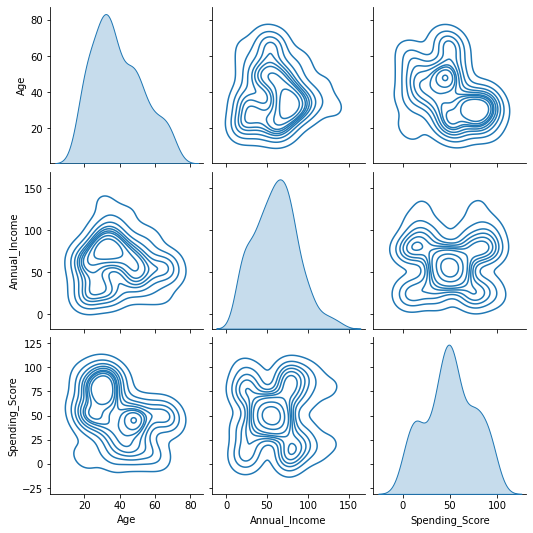

In [15]:
sns.pairplot(data=df[['Age','Annual_Income','Spending_Score']],kind='kde')

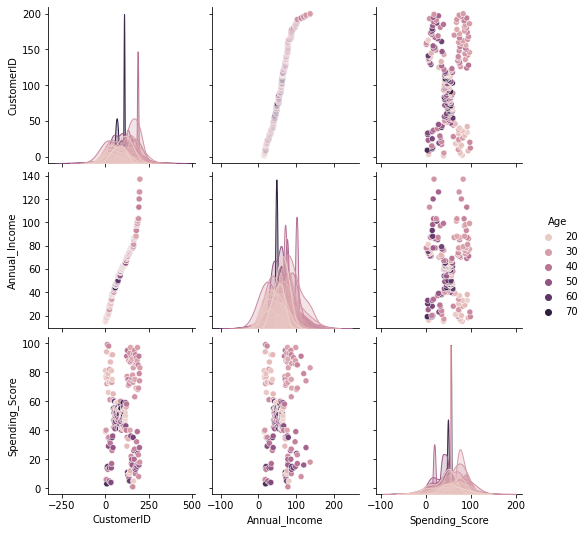

In [16]:
sns.pairplot(df,kind='scatter',hue='Age')

<h3><i>Descriptive statistics</i></h3>

In [17]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h3><i>Handle missing datas</i></h3>

In [18]:
df.isnull().any()

CustomerID        False
Gender            False
Age               False
Annual_Income     False
Spending_Score    False
dtype: bool

<h3><i>Find the outliers and replace the outliers</i></h3>

<AxesSubplot:xlabel='Age'>

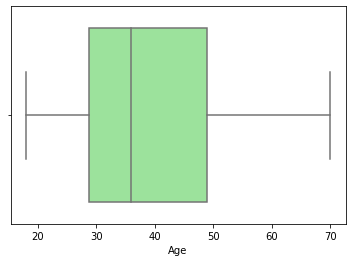

In [19]:
sns.boxplot(x=df.Age,color='lightgreen')

<h3><i>Check for categorical columns and perform encoding</i></h3>

In [20]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [21]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<h3><i>Perform any of the clustering algorithms</i></h3>

In [22]:
from sklearn import cluster
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)
error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[975512.0599999999,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157157.7579059829,
 122625.1981355388,
 103233.01724386725,
 86053.67444777445,
 76938.97565600359,
 69231.3360761156]

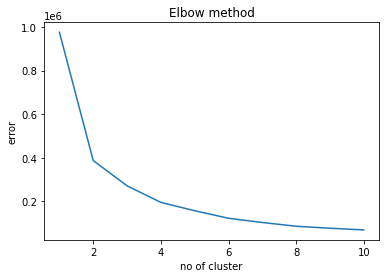

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [24]:
k_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [25]:
k_model.fit(df)

KMeans(n_clusters=3, random_state=0)

In [26]:
clus_data =k_model.predict(df)

<h3><i>Add the cluster data with the primary dataset</i></h3>

In [27]:
df['Clus_data'] = pd.Series(clus_data)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clus_data
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


<h3><i>Split the data into dependent and independent variables</i></h3>

In [28]:
y=df['Clus_data']
y   

0      0
1      0
2      0
3      0
4      0
      ..
195    2
196    2
197    2
198    2
199    2
Name: Clus_data, Length: 200, dtype: int32

In [29]:
X=df.drop(columns=['Clus_data'],axis=1)
X.head()       

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


<h3><i>Scaling the data</i></h3>

In [30]:
from sklearn.preprocessing import scale
data=pd.DataFrame(scale(X),columns=X.columns)
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


<h3><i>Split the data into training and testing</i></h3>

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=1)

In [32]:
X_train.shape,X_test.shape

((140, 5), (60, 5))

In [33]:
y_train.shape,y_test.shape

((140,), (60,))

<h3><i>Build the model</i></h3>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

<h3><i>Train the model</i></h3>

In [35]:
pred_train = model.predict(X_train)
pred_train

array([1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 2, 0])

<h3><i>Test the model</i></h3>

In [36]:
y_test

58     0
40     0
34     0
102    1
184    2
198    2
95     1
4      0
29     0
168    2
171    2
18     0
11     0
89     1
110    1
118    1
159    2
35     0
136    2
59     0
51     0
16     0
44     0
94     1
31     0
162    2
38     0
28     0
193    2
27     0
47     0
165    2
194    2
177    2
176    2
97     1
174    2
73     1
69     1
172    2
108    1
107    1
189    2
14     0
56     0
19     0
114    1
39     0
185    2
124    1
98     1
123    1
119    1
53     0
33     0
179    2
181    2
106    1
199    2
138    2
Name: Clus_data, dtype: int32

In [37]:
pred_test=model.predict(X_test)
pred_test

array([0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 0,
       0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2])

In [38]:
pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_KNN':pred_test})
pred.head()

,Actual_value,Predicted_value_using_KNN
58,0,0
40,0,1
34,0,0
102,1,1
184,2,2


<h3><i>Measure the performance using metrics</i></h3>

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,pred_train))
print('Testing accuracy: ',accuracy_score(y_test,pred_test))

Training accuracy:  0.9214285714285714
Testing accuracy:  0.9166666666666666


In [40]:
pd.crosstab(y_test,pred_test)

col_0,0,1,2
Clus_data,,,
0,19,4,0
1,1,16,0
2,0,0,20


In [41]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.80      0.94      0.86        17
           2       1.00      1.00      1.00        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

